In [27]:
#  Libraries
import pandas as pd 
import matplotlib.pyplot as plt
# loading dataset
df = pd.read_csv('diagnosis.csv')
print(df.head())
print(df.shape)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [28]:
# Dataset has 31 features, 1 id and 1 class i.e. Diagnosis
# Removing Ids
df =df.drop('id', axis=1)
df.shape,df.head()

((569, 32),
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
 0         M        17.99         10.38          122.80     1001.0   
 1         M        20.57         17.77          132.90     1326.0   
 2         M        19.69         21.25          130.00     1203.0   
 3         M        11.42         20.38           77.58      386.1   
 4         M        20.29         14.34          135.10     1297.0   
 
    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 0          0.11840           0.27760          0.3001              0.14710   
 1          0.08474           0.07864          0.0869              0.07017   
 2          0.10960           0.15990          0.1974              0.12790   
 3          0.14250           0.28390          0.2414              0.10520   
 4          0.10030           0.13280          0.1980              0.10430   
 
    symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
 0         0.2419  ...    

In [29]:
# Extracting target feature i.e Diagnosis and  change it in to categorical type. 
target_feature = df['diagnosis']
target_feature = target_feature.replace('M',1)
target_feature = target_feature.replace('B',0)
target_feature
# Fill all Null values with zero
df = df.fillna(value=0)
#Dropping target feature from the dataframe
df = df.drop('diagnosis', axis=1)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [30]:
df.info() #Checking datatypes of features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [31]:
#PCA
from sklearn.decomposition import PCA 
# Changing dataframe in to array
df_array = df.values
type(df_array) # Numpy array

numpy.ndarray

Text(0.5, 1.0, 'PCA with n_components =2')

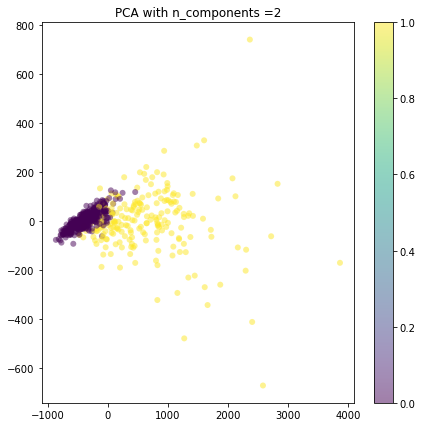

In [36]:
# let's call n_components = 2
components=2
pca_df = PCA(n_components=components)
pca_df = pca_df.fit_transform(df_array)
plt.figure(figsize = (7,7))

plt.scatter(pca_df[:,0],pca_df[:,1], c = target_feature, edgecolor = "None", alpha=0.5)
plt.colorbar()
plt.title('PCA with n_components =2')

/Users/asadtariq/opt/anaconda3/envs/pythonProject/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/asadtariq/opt/anaconda3/envs/pythonProject/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 25.193830
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.452938
[t-SNE] KL divergence after 2000 iterations: 0.306598


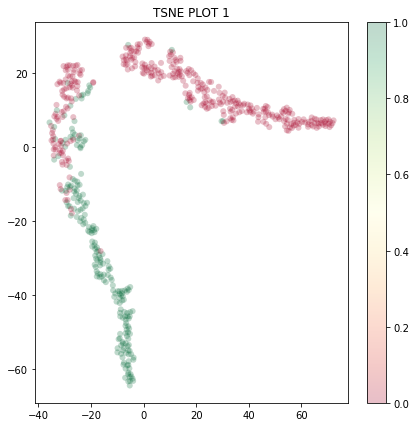

In [37]:
#TSNE
from sklearn.manifold import TSNE
#TSNE method with components = 2, verbose =1 , perplexity=20, n_iter=2000
tsne_df = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=2000)
tsne_data = tsne_df.fit_transform(df_array)
plt.figure(figsize = (7,7))
plt.scatter(tsne_data[:,0],tsne_data[:,1],  c = target_feature, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.25)
plt.colorbar()
plt.title('TSNE PLOT 1')
plt.show()

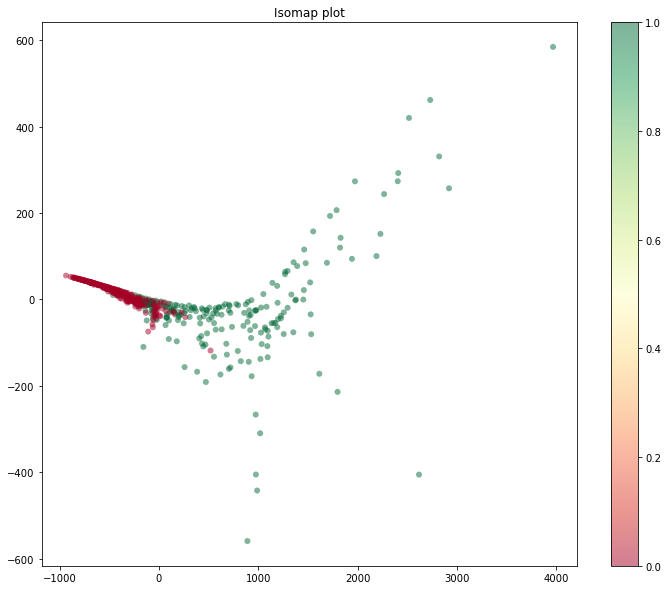

In [38]:
# Isomap
from sklearn.manifold import Isomap
isomap_df = Isomap(n_neighbors=10, n_components=2,  metric='minkowski', p=2, metric_params=None)
isomap_dataframe = isomap_df.fit_transform(df_array)
plt.figure(figsize = (12,10))
plt.scatter(isomap_dataframe[:,0],isomap_dataframe[:,1],  c = target_feature, cmap = "RdYlGn", edgecolor = "None", alpha=0.5)
plt.colorbar()
plt.title('Isomap plot')
plt.show()